<a href="https://colab.research.google.com/github/mrtfzh/TugasSisCerdas_TutorialTensorFlowdanKeras_2101046_MaritaFauziah/blob/main/Tugas_SisCerdas_TutorialTensorFlowdanKeras_2101201046_Marita_Fauziah_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yogantana Arum Panganti | 2101201043

Sin(x) dan Cos(2x)

In [1]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

! pip install tensorflow==2.4.0rc0

import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)


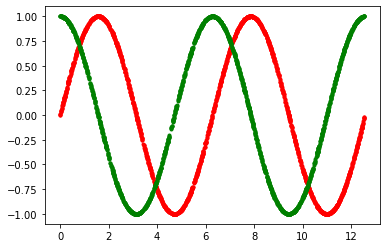

In [35]:
seed = 1
np.random.seed(seed) #digunakan untuk membuat angka secara acak yang dapat diprekdisi
SAMPLES = 2000 #mendeklarasikan jumlah titk data sample yang digunakan, pada percobaan ini digunakan 2000 sample 
x_values = np.random.uniform(low=0, high=4*math.pi, size=SAMPLES).astype(np.float32) #mengenerata gelombang cosinus yang diinginkan dengan batas 0 hingga 4 phi.
np.random.shuffle(x_values) #melakukan proses shuffle yang digunakan untuk memastikan data tidak berurutan 
y_values = np.sin(x_values).astype(np.float32)#fungsi sin(x)
z_values = np.cos(x_values).astype(np.float32)#fungsi cos(2x)
# Menampilkan plot data
plt.plot(x_values, y_values, 'r.')#data sin(x) dengan garis merah
plt.plot(x_values, z_values, 'g.')#data cos(2x) dengan garis hijau
plt.show() # menampilkan ploting grafik yang sudah dibuat sebelumnya


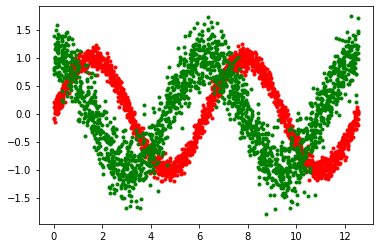

In [36]:
y_values += 0.1 * np.random.randn(*y_values.shape)
z_values += 0.3 * np.random.randn(*z_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'r.')
plt.plot(x_values, z_values, 'g.')
plt.show()


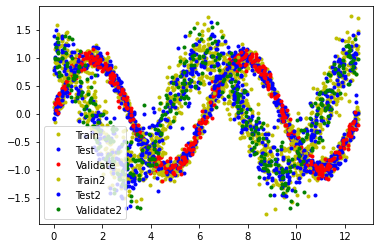

In [37]:
TRAIN_SPLIT =  int(0.5 * SAMPLES)
TEST_SPLIT = int(0.3 * SAMPLES + TRAIN_SPLIT)
#Membagi dataset menjadi tiga bagian
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
z_train, z_test, z_validate = np.split(z_values, [TRAIN_SPLIT, TEST_SPLIT])
# Memeriksa kesesuaian data yang telah dibagi
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES
# Plot data dengan warna dan label yang berbeda
plt.plot(x_train, y_train,  'y.', label="Train")
plt.plot(x_test, y_test, 'b.', label="Test")
plt.plot(x_validate, y_validate, 'r.', label="Validate")
plt.plot(x_train, z_train, 'y.', label="Train2")
plt.plot(x_test, z_test, 'b.', label="Test2")
plt.plot(x_validate, z_validate, 'g.', label="Validate2")
plt.legend()
plt.show()


In [38]:
model = tf.keras.Sequential()
model1 = tf.keras.Sequential()
model.add(keras.layers.Dense(10, activation='relu', input_shape=(1,)))
model1.add(keras.layers.Dense(10, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(1))
model1.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=400, batch_size=64, validation_data=(x_validate, y_validate))
history1 = model1.fit(x_train, z_train, epochs=400, batch_size=64, validation_data=(x_validate, z_validate))


Epoch 1/400
16/16 [==============================] - 0s 9ms/step - loss: 3.3443 - mae: 1.5132 - val_loss: 2.0834 - val_mae: 1.1781
Epoch 2/400
16/16 [==============================] - 0s 3ms/step - loss: 1.9906 - mae: 1.1565 - val_loss: 1.2168 - val_mae: 0.9010
Epoch 3/400
16/16 [==============================] - 0s 3ms/step - loss: 1.2300 - mae: 0.9311 - val_loss: 0.7823 - val_mae: 0.7749
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 0.7750 - mae: 0.7664 - val_loss: 0.6203 - val_mae: 0.7157
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 0.6028 - mae: 0.7021 - val_loss: 0.5728 - val_mae: 0.6853
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5538 - mae: 0.6669 - val_loss: 0.5644 - val_mae: 0.6727
Epoch 7/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5385 - mae: 0.6511 - val_loss: 0.5629 - val_mae: 0.6674
Epoch 8/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5330 - m

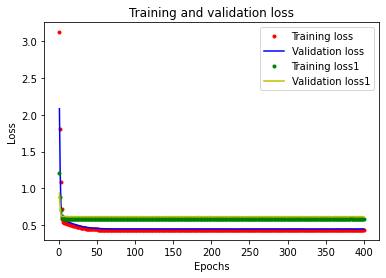

In [39]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs = range(1, len(train_loss) + 1)
epochs1 = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs1, train_loss1, 'g.', label='Training loss1')
plt.plot(epochs1, val_loss1, 'y', label='Validation loss1')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



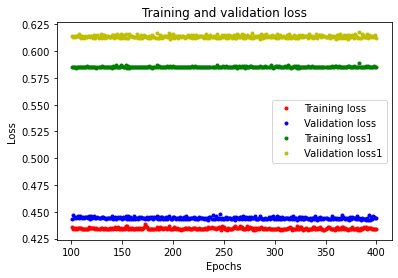

In [40]:
SKIP = 100
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'r.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.plot(epochs1[SKIP:], train_loss1[SKIP:], 'g.', label='Training loss1')
plt.plot(epochs1[SKIP:], val_loss1[SKIP:], 'y.', label='Validation loss1')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


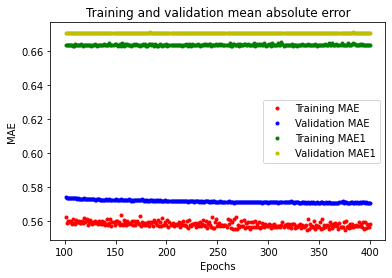

In [41]:
plt.clf()
train_mae = history.history['mae']
val_mae = history.history['val_mae']
train_mae1 = history1.history['mae']
val_mae1 = history1.history['val_mae']
plt.plot(epochs[SKIP:], train_mae[SKIP:], 'r.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.plot(epochs1[SKIP:], train_mae1[SKIP:], 'g.', label='Training MAE1')
plt.plot(epochs1[SKIP:], val_mae1[SKIP:], 'y.', label='Validation MAE1')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


Melakukan kalkulasi jumlah kesalahan pada hasil prediksi dan melihat bentuk grafik dari sisi Mean Absolute error
Hasi perbandingan menggunakan deep learning pada skenario satu

19/19 [==============================] - 0s 978us/step - loss: 0.6133 - mae: 0.6793


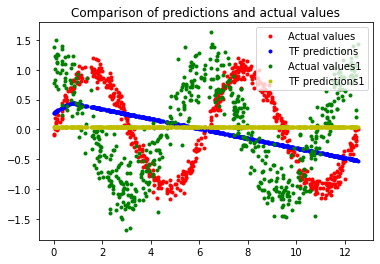

In [42]:
test_loss, test_mae = model.evaluate(x_test, y_test)
test_loss1, test_mae1 = model1.evaluate(x_test, z_test)
y_test_pred = model.predict(x_test)
z_test_pred = model1.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'r.', label='Actual values')
plt.plot(x_test, y_test_pred, 'b.', label='TF predictions')
plt.plot(x_test, z_test, 'g.', label='Actual values1')
plt.plot(x_test, z_test_pred, 'y.', label='TF predictions1')
plt.legend()
plt.show()


Percobaan/Skenario Dua

In [43]:
model_1 = tf.keras.Sequential()
model_2 = tf.keras.Sequential()
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))
model_2.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))
model_1.add(keras.layers.Dense(16, activation='relu'))
model_2.add(keras.layers.Dense(16, activation='relu'))
model_1.add(keras.layers.Dense(24, activation='relu'))
model_2.add(keras.layers.Dense(24, activation='relu'))
model_1.add(keras.layers.Dense(32, activation='relu'))
model_2.add(keras.layers.Dense(32, activation='relu'))
model_1.add(keras.layers.Dense(1))
model_2.add(keras.layers.Dense(1))
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_1 = model_1.fit(x_train, y_train, epochs=400, batch_size=64,validation_data=(x_validate, y_validate))
history_2 = model_2.fit(x_train, z_train, epochs=400, batch_size=64,validation_data=(x_validate, z_validate))
model_1.save(MODEL_TF)
model_2.save(MODEL_TF)


Epoch 1/400
16/16 [==============================] - 1s 11ms/step - loss: 0.5174 - mae: 0.6334 - val_loss: 0.5260 - val_mae: 0.6285
Epoch 2/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4763 - mae: 0.5988 - val_loss: 0.4988 - val_mae: 0.6169
Epoch 3/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4727 - mae: 0.5977 - val_loss: 0.4727 - val_mae: 0.6064
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4652 - mae: 0.5977 - val_loss: 0.4620 - val_mae: 0.5924
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4445 - mae: 0.5767 - val_loss: 0.4459 - val_mae: 0.5835
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4520 - mae: 0.5711 - val_loss: 0.4371 - val_mae: 0.5726
Epoch 7/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4043 - mae: 0.5431 - val_loss: 0.4401 - val_mae: 0.5649
Epoch 8/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4444 - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets


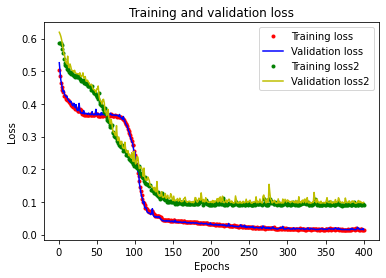

In [44]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
train_loss2 = history_2.history['loss']
val_loss2 = history_2.history['val_loss']
epochs = range(1, len(train_loss) + 1)
epochs2 = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs2, train_loss2, 'g.', label='Training loss2')
plt.plot(epochs2, val_loss2, 'y', label='Validation loss2')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


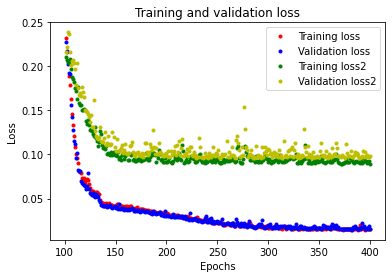

In [45]:
SKIP = 100
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'r.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.plot(epochs2[SKIP:], train_loss2[SKIP:], 'g.', label='Training loss2')
plt.plot(epochs2[SKIP:], val_loss2[SKIP:], 'y.', label='Validation loss2')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

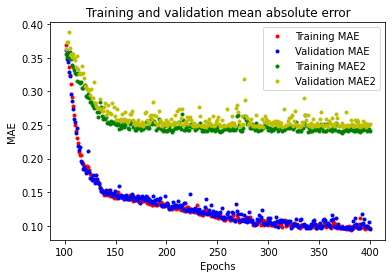

In [46]:
plt.clf()
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
train_mae2 = history_2.history['mae']
val_mae2 = history_2.history['val_mae']
plt.plot(epochs[SKIP:], train_mae[SKIP:], 'r.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.plot(epochs2[SKIP:], train_mae2[SKIP:], 'g.', label='Training MAE2')
plt.plot(epochs2[SKIP:], val_mae2[SKIP:], 'y.', label='Validation MAE2')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 [==============================] - 0s 950us/step - loss: 0.0974 - mae: 0.2451


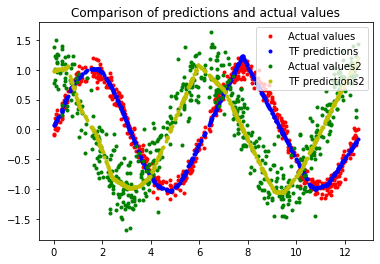

In [47]:
test_loss, test_mae = model_1.evaluate(x_test, y_test)
test_loss2, test_mae2 = model_2.evaluate(x_test, z_test)
y_test_pred = model_1.predict(x_test)
z_test_pred = model_2.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'r.', label='Actual values')
plt.plot(x_test, y_test_pred, 'b.', label='TF predictions')
plt.plot(x_test, z_test, 'g.', label='Actual values2')
plt.plot(x_test, z_test_pred, 'y.', label='TF predictions2')
plt.legend()
plt.show()


Percobaan/Skenario Tiga
Menggunakan Optimizer sgd
 

In [48]:
model_3 = tf.keras.Sequential()
model_4 = tf.keras.Sequential()
model_3.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))
model_4.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))
model_3.add(keras.layers.Dense(16, activation='relu'))
model_4.add(keras.layers.Dense(16, activation='relu'))
model_3.add(keras.layers.Dense(24, activation='relu'))
model_4.add(keras.layers.Dense(24, activation='relu'))
model_3.add(keras.layers.Dense(32, activation='relu'))
model_4.add(keras.layers.Dense(32, activation='relu'))
model_3.add(keras.layers.Dense(40, activation='relu'))
model_4.add(keras.layers.Dense(40, activation='relu'))
model_3.add(keras.layers.Dense(1))
model_4.add(keras.layers.Dense(1))
model_3.compile(optimizer='sgd', loss='mse', metrics=['mae'])
model_4.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history_3 = model_3.fit(x_train, y_train, epochs=400, batch_size=64,validation_data=(x_validate, y_validate))
history_4 = model_4.fit(x_train, z_train, epochs=400, batch_size=64,validation_data=(x_validate, z_validate))
model_3.save(MODEL_TF)
model_4.save(MODEL_TF)

Epoch 1/400
16/16 [==============================] - 0s 12ms/step - loss: 0.6903 - mae: 0.6994 - val_loss: 0.5064 - val_mae: 0.6244
Epoch 2/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4734 - mae: 0.5953 - val_loss: 0.4844 - val_mae: 0.6142
Epoch 3/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4664 - mae: 0.5932 - val_loss: 0.4951 - val_mae: 0.6075
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4634 - mae: 0.5831 - val_loss: 0.4684 - val_mae: 0.5979
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4635 - mae: 0.5889 - val_loss: 0.5316 - val_mae: 0.6119
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4505 - mae: 0.5696 - val_loss: 0.4822 - val_mae: 0.6137
Epoch 7/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4607 - mae: 0.5844 - val_loss: 0.4542 - val_mae: 0.5861
Epoch 8/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4399 - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets


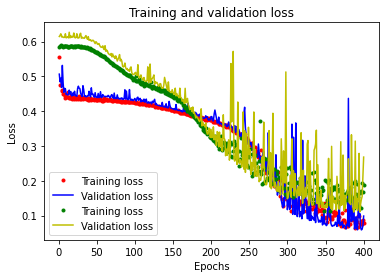

In [49]:
train_loss3 = history_3.history['loss']
val_loss3 = history_3.history['val_loss']
train_loss4 = history_4.history['loss']
val_loss4 = history_4.history['val_loss']
epochs3 = range(1, len(train_loss3) + 1)
epochs4 = range(1, len(train_loss4) + 1)
plt.plot(epochs3, train_loss3, 'r.', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.plot(epochs4, train_loss4, 'g.', label='Training loss')
plt.plot(epochs4, val_loss4, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

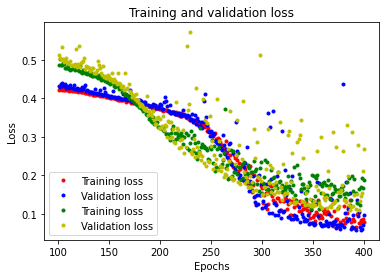

In [50]:
SKIP = 100
plt.plot(epochs3[SKIP:], train_loss3[SKIP:], 'r.', label='Training loss')
plt.plot(epochs3[SKIP:], val_loss3[SKIP:], 'b.', label='Validation loss')
plt.plot(epochs4[SKIP:], train_loss4[SKIP:], 'g.', label='Training loss')
plt.plot(epochs4[SKIP:], val_loss4[SKIP:], 'y.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

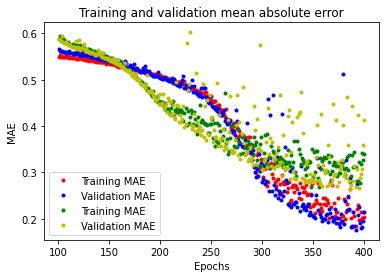

In [51]:
plt.clf()
train_mae3 = history_3.history['mae']
val_mae3 = history_3.history['val_mae']
train_mae4 = history_4.history['mae']
val_mae4 = history_4.history['val_mae']
plt.plot(epochs3[SKIP:], train_mae3[SKIP:], 'r.', label='Training MAE')
plt.plot(epochs3[SKIP:], val_mae3[SKIP:], 'b.', label='Validation MAE')
plt.plot(epochs4[SKIP:], train_mae4[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs4[SKIP:], val_mae4[SKIP:], 'y.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 [==============================] - 0s 946us/step - loss: 0.2693 - mae: 0.4104


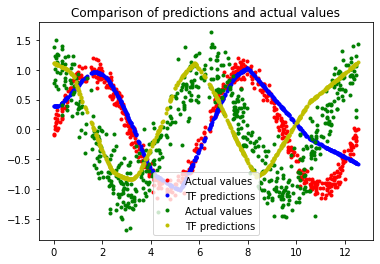

In [52]:
test_loss3, test_mae3 = model_3.evaluate(x_test, y_test)
test_loss4, test_mae4 = model_4.evaluate(x_test, z_test)
y_test_pred = model_3.predict(x_test)
z_test_pred = model_4.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'r.', label='Actual values')
plt.plot(x_test, y_test_pred, 'b.', label='TF predictions')
plt.plot(x_test, z_test, 'g.', label='Actual values')
plt.plot(x_test, z_test_pred, 'y.', label='TF predictions')
plt.legend()
plt.show()
